# EEG - Flow

## 5. ICA compare components selections

Last edit: 07.05.2023 05:04
@anguyen

In [1]:
import os
from datetime import datetime
import matplotlib.pyplot as plt

from mne.viz import set_browser_backend

%matplotlib qt
set_browser_backend('qt')

from eeg_flow.tasks.ica_compare import(
    prep_ica_compare,
    load_ica_rev,
    compare_two_revs,
)


Using qt as 2D backend.


The parameters of the file to process are defined below. Locks are created to prevent someone else from running the same task and from writing the same derivatives.

In [2]:
"""
PARTICIPANT: str (for example "P03", "P28")
GROUP:       str ["G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8"]
TASK:        str, ["oddball", "UT"]
RUN:         int [1, 2]
ICA_NB:      int [1, 2]
"""

PARTICIPANT = "P02"
GROUP       = "G2"
TASK        = "oddball"
RUN         = 1
ICA_NB      = 1

REVIEWER1 = "anguyen3"
REVIEWER2 = "anguyen4"

In [3]:
DERIVATIVES_SUBFOLDER, FNAME_STEM, raw, raw_ica_fit, locks = prep_ica_compare(PARTICIPANT, GROUP, TASK, RUN, ICA_NB)
DERIVATIVES_ICA = DERIVATIVES_SUBFOLDER / "plots" / "ica"

Opening raw data file L:\EEG_Flow_data\derivatives\sub-P02-G2\sub-P02-G2_task-oddball_run-1\sub-P02-G2_task-oddball_run-1_step1_raw.fif...
    Range : 6859 ... 385142 =      6.698 ...   376.115 secs
Ready.
Reading 0 ... 378283  =      0.000 ...   369.417 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 3381 samples (3.302 s)



C:\Users\anguyen\git\ArthurNguyen\eeg-flow_source_Mathieu\eeg_flow\tasks\ica_compare.py:104: RuntimeWarning: Omitted 7 annotation(s) that were outside data range.
  raw.set_annotations(annot)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.6s finished


In [4]:
ica_rev1, ica_rev2 = load_ica_rev(
    DERIVATIVES_SUBFOLDER, FNAME_STEM, REVIEWER1, REVIEWER2, ICA_NB
)

Reading L:\EEG_Flow_data\derivatives\sub-P02-G2\sub-P02-G2_task-oddball_run-1\sub-P02-G2_task-oddball_run-1_step4_reviewed-1st-anguyen3-ica.fif ...
Now restoring ICA solution ...
Ready.
Reading L:\EEG_Flow_data\derivatives\sub-P02-G2\sub-P02-G2_task-oddball_run-1\sub-P02-G2_task-oddball_run-1_step4_reviewed-1st-anguyen4-ica.fif ...
Now restoring ICA solution ...
Ready.


In [5]:
exclude_common, exclude_diff = compare_two_revs(ica_rev1, ica_rev2)

In [6]:
# create figure to validate components that have been commonly excluded.
if len(exclude_common) != 0:
    f_common = ica1_rev1.plot_components(picks=exclude_common, inst=raw_ica_fit, show=False)
    f_common.show()


In [ ]:
print(exclude_common)
print(exclude_diff)

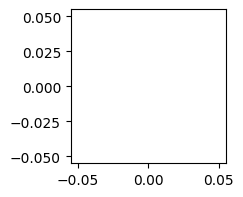

In [9]:
%matplotlib inline
# to avoid the bug
plt.figure(figsize=(2,2))
plt.plot([])

In [10]:
# this is to bypass the fact that ica plot components with picks not none only
# plots the first 20 components

def divide_chunks(exclude_diff):
    # looping till length l
    for i in range(0, len(exclude_diff),20):
        yield exclude_diff[i:i + 20]

exclude_diff_per20 = list(divide_chunks(exclude_diff))

In [16]:
# create figure to validate components that have been differently excluded.
%matplotlib qt
print(len(exclude_diff_per20))
f_dif = []
if len(exclude_diff) != 0:
    for chunk in exclude_diff_per20:
        f_dif.append(ica_rev1.plot_components(
            title=f"{FNAME_STEM} | ICA{ICA_NB} | Reviewers difference",
            picks=chunk,
            inst=raw_ica_fit,
            show=True)
            )

2


In [17]:
figs_ica_sources = ica_rev1.plot_sources(
    title=f"{FNAME_STEM} | ICA{ICA_NB}",
    show=True,
    inst=raw_ica_fit,
)

Creating RawArray with float64 data, n_channels=65, n_times=378284
    Range : 6859 ... 385142 =      6.698 ...   376.115 secs
Ready.


C:\Users\anguyen\AppData\Local\Temp\ipykernel_18140\2618176650.py:1: RuntimeWarning: Omitted 7 annotation(s) that were outside data range.
  figs_ica_sources = ica_rev1.plot_sources(


In [20]:
timestampStr = datetime.now().strftime("%Y-%m-%d__%H-%M")
for i, fig in enumerate(f_dif):
    FNAME_ICA_DIFF = (
        DERIVATIVES_ICA / f"allComponents_ICA{ICA_NB}_revdiff_{i+1}_timestampStr.svg"
    )
    fig.savefig(FNAME_ICA_DIFF, transparent=True)

In [ ]:
#plot final res

In [22]:
# same here, this might require to be run twice
%matplotlib qt
figs_ica_comp = ica_rev1.plot_components(
    title=f"{FNAME_STEM} | ICA{ICA_NB} Final review",
    show=True,
    inst=raw_ica_fit
)

In [23]:
timestampStr = datetime.now().strftime("%Y-%m-%d__%H-%M")
for i, fig in enumerate(figs_ica_comp):
    FNAME_ICA_COMP = (
        DERIVATIVES_ICA / f"allComponents_ICA{ICA_NB}_Final{i+1}_timestampStr.svg"
    )
    fig.savefig(FNAME_ICA_COMP, transparent=True)

## 4.1 Annotate bad ICs from ICA1 for mastoids
 - At this stage, let's only focus on the mastoids. Look for:
 - heartbeat in the IC-time series
 - muscle/noise on the mastoids on the topographic map

## 4.3 Save derivatives

The ICA decomposition can be saved.

In [25]:
if ICA_NB == 1:
    FNAME_ICA = DERIVATIVES_SUBFOLDER / (FNAME_STEM + "_step5_reviewed-1st-ica.fif")
elif ICA_NB == 2:
    FNAME_ICA = DERIVATIVES_SUBFOLDER / (FNAME_STEM + "_step5_reviewed-2nd-ica.fif")

ica_rev1.save(FNAME_ICA, overwrite=False)


Writing ICA solution to L:\EEG_Flow_data\derivatives\sub-P02-G2\sub-P02-G2_task-oddball_run-1\sub-P02-G2_task-oddball_run-1_step5_reviewed-1st-ica.fif...


Method,picard
Fit,206 iterations on raw data (378284 samples)
ICA components,62
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,ICA040ICA041ICA042ICA043ICA044ICA049ICA048ICA046ICA045ICA047ICA052ICA053ICA054ICA059ICA058ICA057ICA055ICA056


Regardless of the success of the task, the locks must be released.
If this step is forgotten, someone might have to remove the corresponding `.lock` file manually.

In [26]:
for lock in locks:
    lock.release()
del locks  # delete would release anyway